## <center> KNN model<center>
## <center> Classification Problem <center>

In [48]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics 



In [49]:
#load Iris dataset
data = load_iris()
print(data.data.shape)

(150, 4)


(1.5, 4.9)

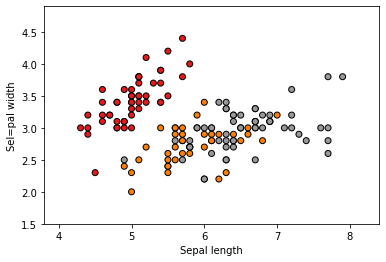

In [50]:
x = data.data[:,:4]
y = data.target

x_min, x_max = x[:,0].min()-.5, x[:,0].max()+.5
y_min, y_max = x[:,1].min()-.5, x[:,1].max()+.5

#plot training options
plt.scatter(x[:,0],x[:,1], c=y, cmap=plt.cm.Set1, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sel=pal width')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)



In [51]:
#Dive the data into training  and testing sets

X= data.data
Y=data.target

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=.20, random_state=42)

nbr = NearestNeighbors(n_neighbors=3, algorithm='ball_tree')

nbr.fit(x_train)

NearestNeighbors(algorithm='ball_tree', n_neighbors=3)

In [52]:
# finding the 

distance, indices = nbr.kneighbors(x_test.reshape(-1,4), return_distance=True)
print(distance.shape)
print(distance)
print(indices)

(30, 3)
[[0.2236068  0.3        0.43588989]
 [0.33166248 0.38729833 0.46904158]
 [0.41231056 0.54772256 0.89442719]
 [0.2        0.24494897 0.33166248]
 [0.31622777 0.34641016 0.34641016]
 [0.28284271 0.3        0.3       ]
 [0.4472136  0.50990195 0.51961524]
 [0.36055513 0.46904158 0.51961524]
 [0.26457513 0.50990195 0.53851648]
 [0.14142136 0.26457513 0.28284271]
 [0.2236068  0.37416574 0.42426407]
 [0.14142136 0.2        0.26457513]
 [0.3        0.33166248 0.34641016]
 [0.1        0.17320508 0.2       ]
 [0.14142136 0.14142136 0.24494897]
 [0.26457513 0.37416574 0.42426407]
 [0.36055513 0.38729833 0.43588989]
 [0.17320508 0.24494897 0.26457513]
 [0.3        0.31622777 0.31622777]
 [0.42426407 0.43588989 0.46904158]
 [0.17320508 0.2236068  0.2236068 ]
 [0.14142136 0.24494897 0.28284271]
 [0.2        0.2236068  0.2236068 ]
 [0.33166248 0.37416574 0.38729833]
 [0.41231056 0.88317609 0.92736185]
 [0.36055513 0.36055513 0.37416574]
 [0.6        0.6164414  0.6244998 ]
 [0.2236068  0.31622

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn_cl = KNeighborsClassifier(n_neighbors=3)
knn_cl.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [54]:
# check the classification results
classification_results = knn_cl.predict(x_test)
print(classification_results)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [55]:
#find the posterior probability of the model
knn_cl.predict_proba(x_test)

array([[0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 1.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.

In [56]:
#computing classfication metrics 
print(metrics.classification_report(classification_results,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Confusion matrix, normalized
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


/Users/emmanuelhilliard/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


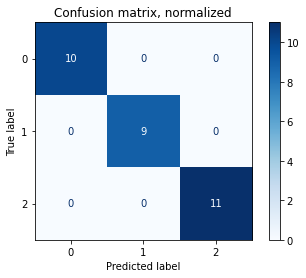

In [57]:
from sklearn.metrics import plot_confusion_matrix
title_options=[("Confusion matrix, normalized", None)]

for title, normalize in title_options:
    disp= plot_confusion_matrix(knn_cl,x_test,y_test,cmap= plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
plt.show()

